In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con

# Optics for water

## Absorption and scattering

In [2]:
#data from texts
data = np.genfromtxt('Optics/Fewell_AO348325_Data_File_1.csv', delimiter = ',', skip_header=3).T

data_ab = data[:3] #wavelength (nm)	pure water value 	pure water uncertainty

#https://bg.copernicus.org/articles/4/1041/2007/bg-4-1041-2007.pdf
# doesn't really match what Soud had in his graphs - actually I think it's not bad, just it's missing the lower values
data = np.genfromtxt('Optics/scattering.csv', delimiter = ',')

data_sca = data[:,1:]

In [3]:
'''
data from https://github.com/nEXO-collaboration/nexo-offline/blob/
6807b2f844f6f34215f4b9764626e35140838bfd/Simulation/DetSim/nEXOSim/src/nEXOMaterials.cc#L1101
'''

m = 1
eV= 1

H2OEnergy_od = np.array([2.07*eV, 2.09*eV, 2.12*eV, 2.20*eV, 2.31*eV,
       2.41*eV, 2.48*eV, 2.55*eV, 2.71*eV, 2.83*eV ,
       2.96*eV, 3.05*eV, 3.13*eV, 3.25*eV, 3.32*eV,
       3.45*eV, 3.57*eV, 3.69*eV, 3.85*eV, 3.99*eV,
       4.26*eV, 4.99*eV, 5.29*eV]) #eV

H2ORefractiveIndex_od = np.array([1.332     , 1.33233458, 1.33275974, 1.333     , 1.33337057,
       1.33440426, 1.33497163, 1.33553901, 1.33667376, 1.33746809,
       1.33824548, 1.33866779, 1.33926229, 1.34044132, 1.34115378,
       1.3422317 , 1.34324954, 1.34459331, 1.34635211, 1.34761808,
       1.35056125, 1.36267944, 1.36844391])

H2OImagRefractiveIndex_od = np.array([1.09000000e-08, 8.67541598e-09, 5.81397568e-09, 2.59957621e-09,
       1.58045850e-09, 1.15469946e-09, 1.00331820e-09, 9.51327519e-10,
       9.79448873e-10, 1.12037523e-09, 1.40633887e-09, 1.65035772e-09,
       2.03323649e-09, 2.96013074e-09, 3.67273184e-09, 5.28589740e-09,
       6.86164978e-09, 8.73845457e-09, 1.13689749e-08, 1.36037402e-08,
       1.84743981e-08, 3.43031978e-08, 4.10709380e-08])
    
H2OAbsorption_od = np.array([4.57*m ,    7.41*m,   11.22*m,   19.50*m,
         47.86*m,   92.28*m,  113.50*m,  190.55*m ,
        407.38*m ,  660.69*m,  841.40*m, 1071.52*m,
       1148.15*m ,  870.96*m,  660.69*m,  421.70*m,
        211.35*m,  105.93*m,   44.67*m,   23.99*m,
         18.84*m,   14.79*m,    9.44*m])

In [4]:
h = con.physical_constants['Planck constant in eV/Hz'][0]
c = con.c #m/s

def eVtoWavelength(E): #eV to nm
    return h*c/E * 1e9

In [5]:
data_grab = np.genfromtxt('Optics/GrabedFromGraph_scat.csv', delimiter = ',').T

data_Soud = np.genfromtxt('Optics/SoudWaterProp.csv', delimiter = ',').T

# print(data)

In [6]:
# plt.plot(data[0], data[1])
# plt.semilogy(data_ab[0], data_ab[1], label="Absorption")

# # plt.plot(data_sca[0], data_sca[1], label="scattering")

# plt.xlabel("wavelength [nm]")
# plt.ylabel("pure water coefficent [m$^-1$]")

# plt.xlim(250, 1000)
# plt.legend()
# plt.show()

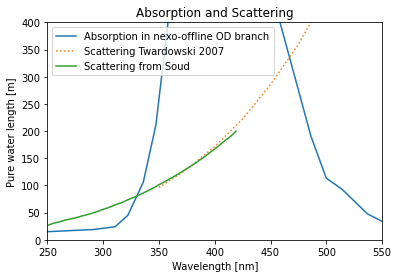

In [7]:
# plt.plot(data_ab[0], 1/data_ab[1], label="Absorption")
plt.plot(eVtoWavelength(H2OEnergy_od), H2OAbsorption_od, label="Absorption in nexo-offline OD branch") #not really sure why these two are offset

plt.plot(data_sca[0], 1/(data_sca[2]*1e-4), label="Scattering Twardowski 2007", ls=":")
# plt.plot(data_sca[0], 1/(data_sca[3]*1e-4), label="scattering2", ls=":")

# plt.plot(data_grab[0], 1/(data_grab[1]*1e-4), label="scattering_graph")

plt.plot(data_Soud[0], data_Soud[1], label="Scattering from Soud")


plt.xlabel("Wavelength [nm]")
plt.ylabel("Pure water length [m]")
plt.title("Absorption and Scattering")


plt.xlim(250, 550)
plt.ylim(0, 400)

plt.legend()
plt.show()

### index of refraction

In [8]:
data = np.genfromtxt('Optics/Huibers1997_Table1.csv', delimiter = ',', skip_header=1).T

data_i1a = data[:2,:-8]
data_i1b = data[2:]

In [9]:
# print(eVtoWavelength(H2OEnergy))

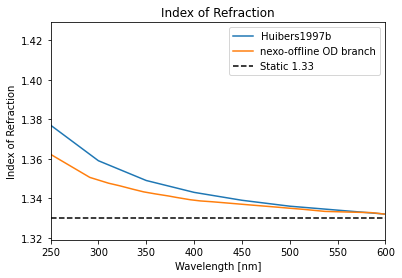

In [10]:
# plt.plot(data_i1a[0], data_i1a[1], label="Huibers1997a")
plt.plot(data_i1b[0], data_i1b[1], label="Huibers1997b")

plt.plot(eVtoWavelength(H2OEnergy_od), H2ORefractiveIndex_od, label="nexo-offline OD branch")

plt.axhline(y=1.33, color="black", ls="--", label="Static 1.33")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Index of Refraction")
plt.title("Index of Refraction")

plt.xlim(250, 600)
plt.legend()
plt.show()

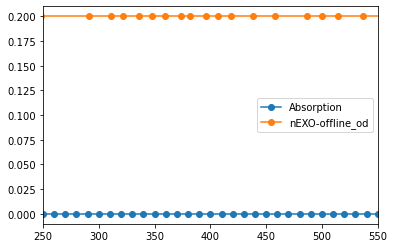

In [11]:
# plt.plot(data_ab[0], 1/data_ab[1], label="Absorption")
# plt.plot(eVtoWavelength(H2OEnergy_od), H2OAbsorption_od, label="nEXO-offline_od")

plt.plot(data_ab[0], data_ab[0]*0, label="Absorption", marker="o")
plt.plot(eVtoWavelength(H2OEnergy_od), eVtoWavelength(H2OEnergy_od)*0+.2, label="nEXO-offline_od", marker="o")

plt.xlim(250, 550)
plt.legend()
plt.show()

# Optics for PMTs

In [12]:
"""
Define borosilicate optical properties
Pyrex, according to DB XML files  //Taken from Daya Bay DDDB/materials/pyrex.xml
"""
mm = 1

pyrexEnergies = np.array([1.55*eV, 1.61*eV, 2.07*eV, 2.48*eV, 15.5*eV])
pyrexRindex = np.array([1.458, 1.458, 1.458, 1.458, 1.458])
pyrexAbsorption = np.array([0.1E-3*mm, 0.5E3*mm, 1.0E3*mm, 2.0E3*mm, 1.0E3*mm]);

"""
Define Bialkali optical properties for PMT photocathode - Data from Daya Bay collaboration sims
"""
BialkaliEnergy = np.array([1.55*eV, 15.5*eV ])
BialkaliRefractiveIndex = np.array([2.9,  2.9])
BialkaliImaginaryindex = np.array([1.6, 1.6])

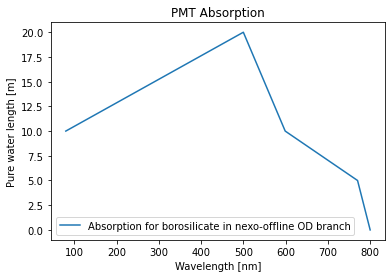

In [13]:
plt.plot(eVtoWavelength(pyrexEnergies), pyrexAbsorption/100, label="Absorption for borosilicate in nexo-offline OD branch") #not really sure why these two are offset

# plt.plot(eVtoWavelength(BialkaliEnergy), BialkaliImaginaryindex/100, label="Absorption in nexo-offline OD branch") #not really sure why these two are offset

plt.xlabel("Wavelength [nm]")
plt.ylabel("Pure water length [m]")
plt.title("PMT Absorption")

# plt.xlim(250, 550)
# plt.ylim(0, 400)

plt.legend()
plt.show()

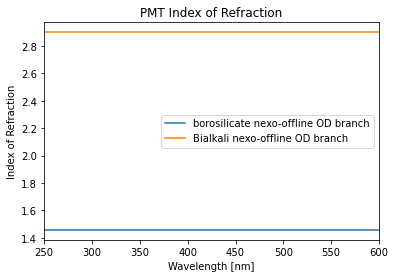

In [14]:
plt.plot(eVtoWavelength(pyrexEnergies), pyrexRindex, label="borosilicate nexo-offline OD branch")
plt.plot(eVtoWavelength(BialkaliEnergy), BialkaliRefractiveIndex, label="Bialkali nexo-offline OD branch")


plt.xlabel("Wavelength [nm]")
plt.ylabel("Index of Refraction")
plt.title("PMT Index of Refraction")

plt.xlim(250, 600)
plt.legend()
plt.show()